In [66]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy import signal
import pyedflib
from pyedflib import highlevel

In [89]:
#Constants 
filePath = r"C:\Users\Humperdink2\Documents\github\NAThacks\Data\files\S001\S001R07.edf"
outPath = r"C:\Users\Humperdink2\Documents\github\NAThacks\Data\imgs"
channels = ["C3..", "C4..","CZ..","F4.."]
labels = {
    "T00" : "rest",
    "T01" : ["rightHand", "leftHand"],
    "T02" : ["bothHands", "bothFeet"]
}
frequency = 160
time_period = 640
prc_overlap = .90

In [90]:
#reading EDF file and extracting 
annotations = ""
file = ""

file = pyedflib.EdfReader(filePath)  
annotations = file.readAnnotations()
file.close()

signals, signal_headers, header = highlevel.read_edf(filePath, ch_names=channels)

In [91]:
#Verification of labels
print(annotations)

(array([  0. ,   4.2,   8.3,  12.5,  16.6,  20.8,  24.9,  29.1,  33.2,
        37.4,  41.5,  45.7,  49.8,  54. ,  58.1,  62.3,  66.4,  70.6,
        74.7,  78.9,  83. ,  87.2,  91.3,  95.5,  99.6, 103.8, 107.9,
       112.1, 116.2, 120.4]), array([4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2,
       4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1,
       4.2, 4.1, 4.2, 4.1]), array(['T0', 'T1', 'T0', 'T2', 'T0', 'T1', 'T0', 'T2', 'T0', 'T1', 'T0',
       'T2', 'T0', 'T2', 'T0', 'T1', 'T0', 'T1', 'T0', 'T2', 'T0', 'T2',
       'T0', 'T1', 'T0', 'T2', 'T0', 'T1', 'T0', 'T1'], dtype='<U2'))


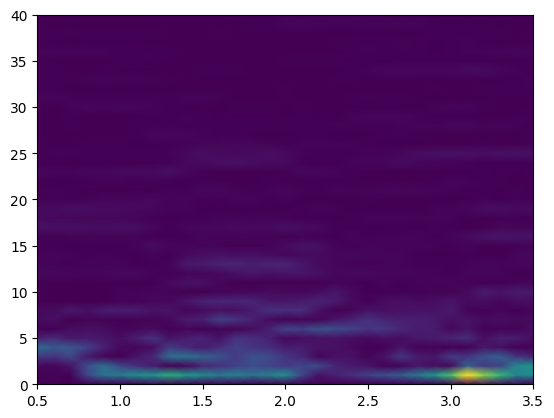

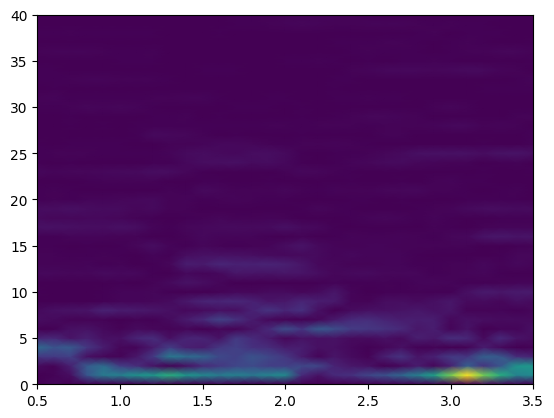

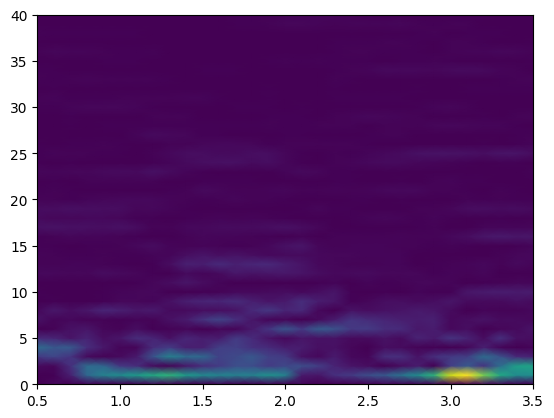

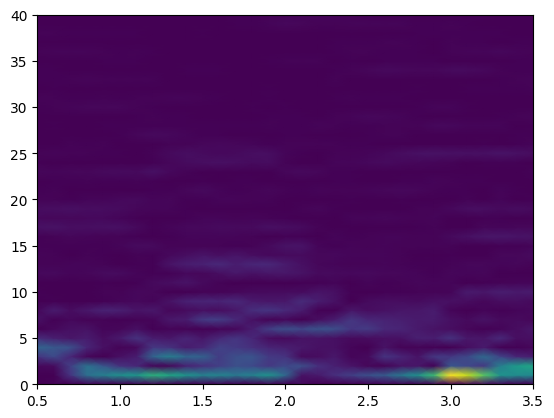

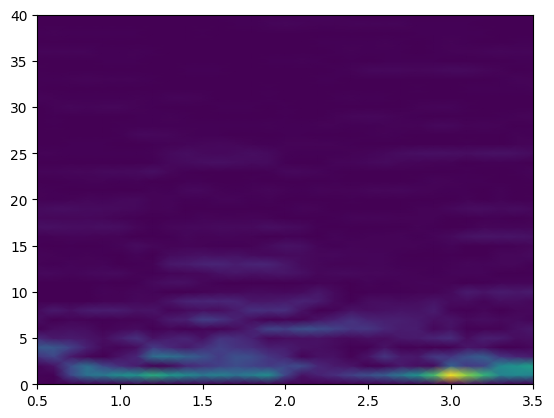

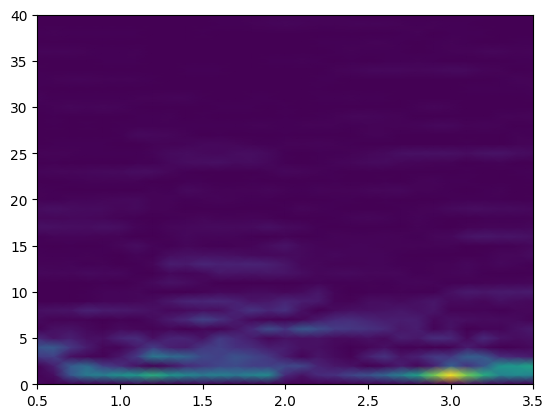

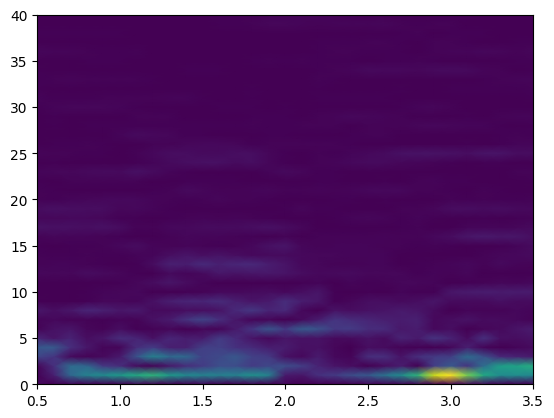

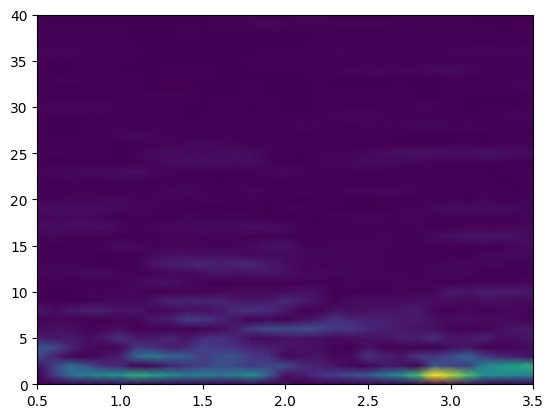

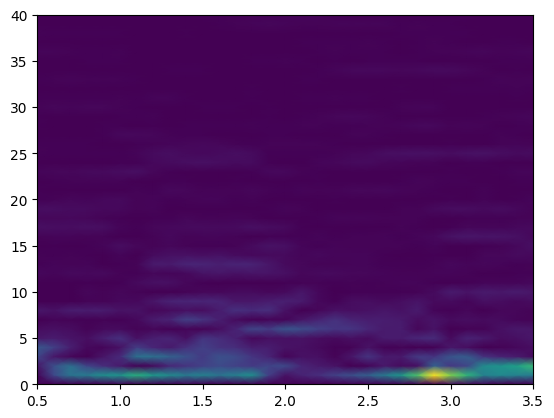

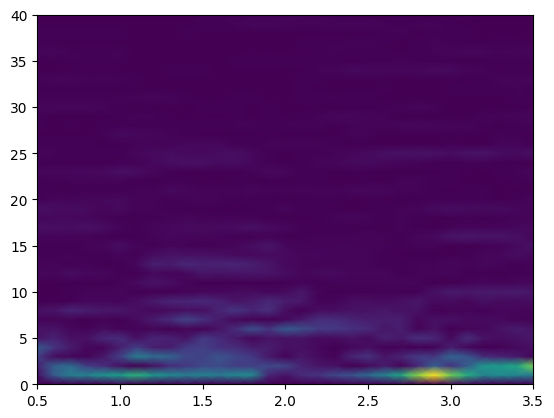

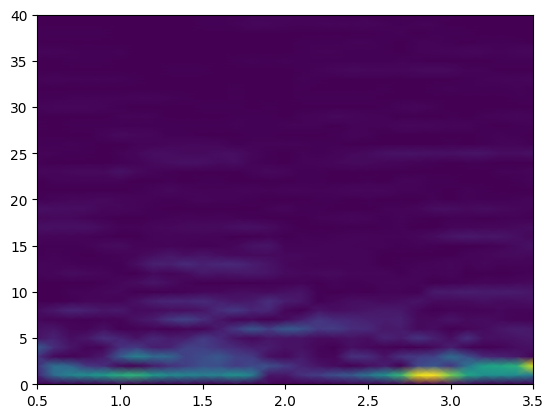

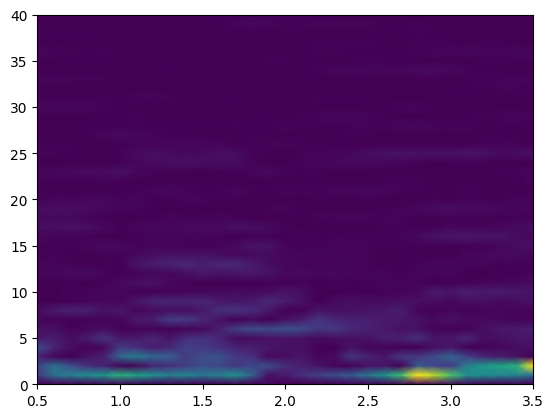

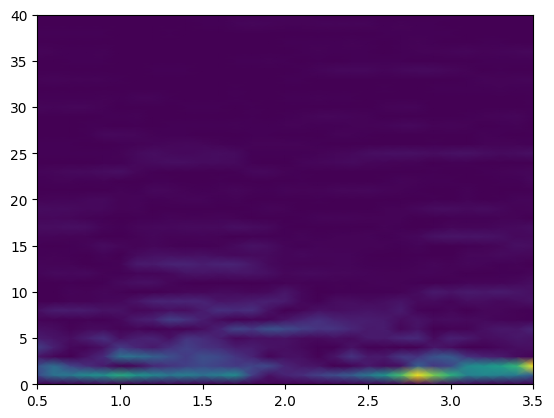

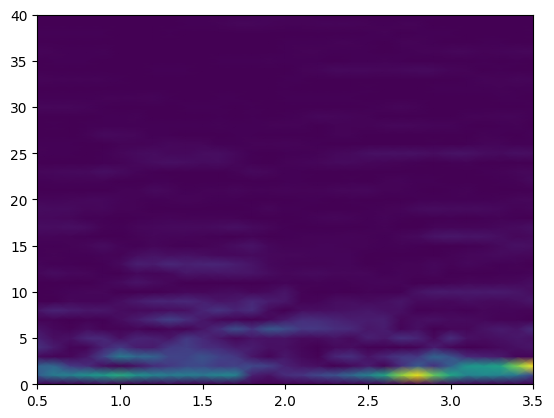

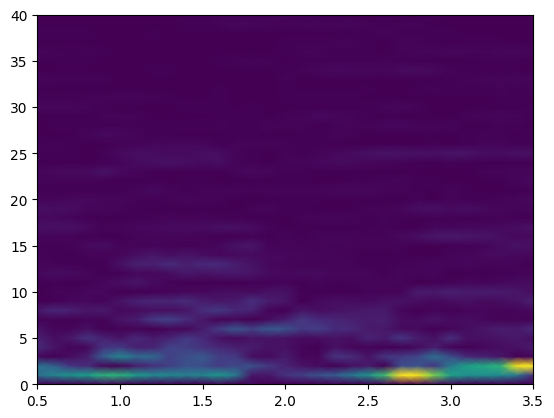

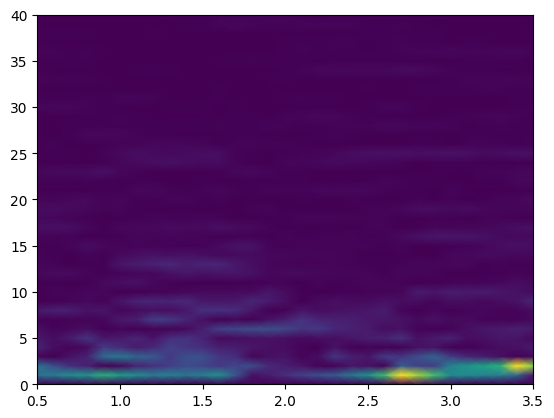

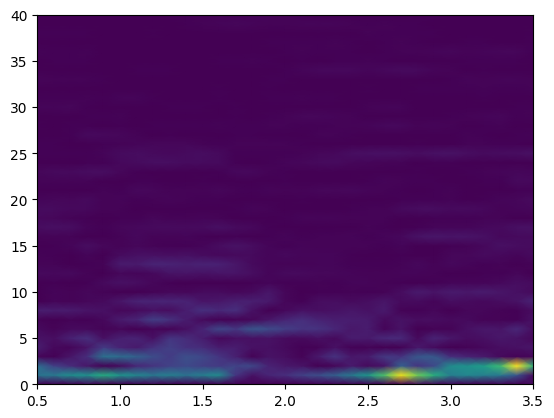

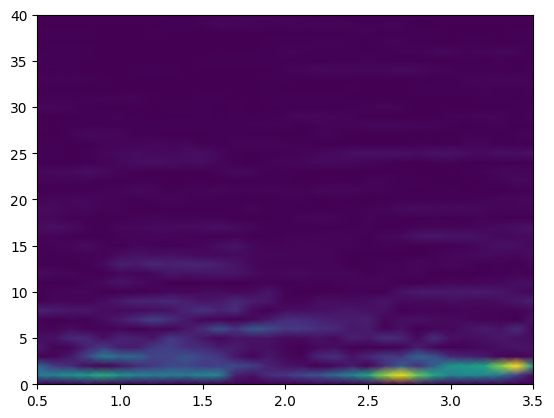

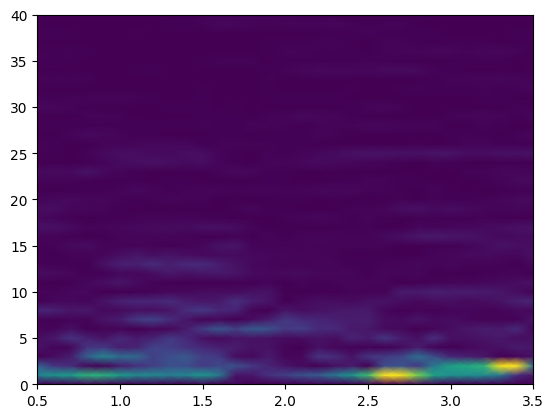

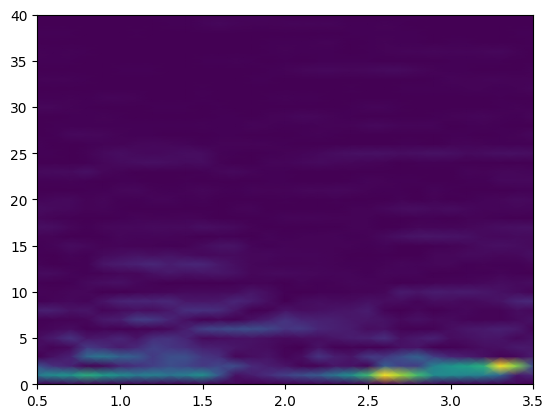

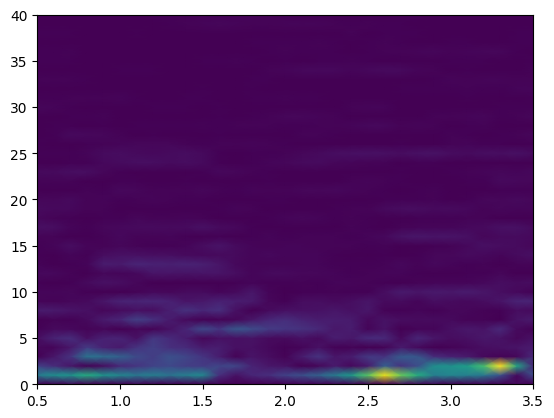

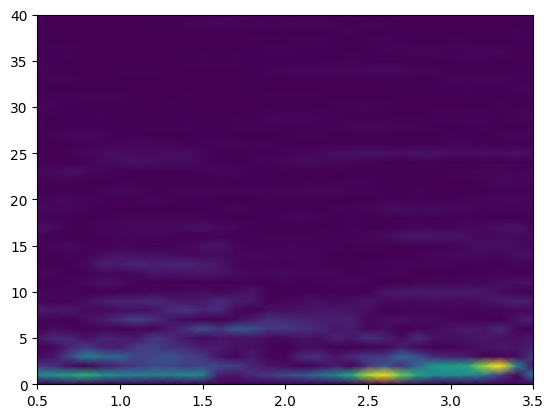

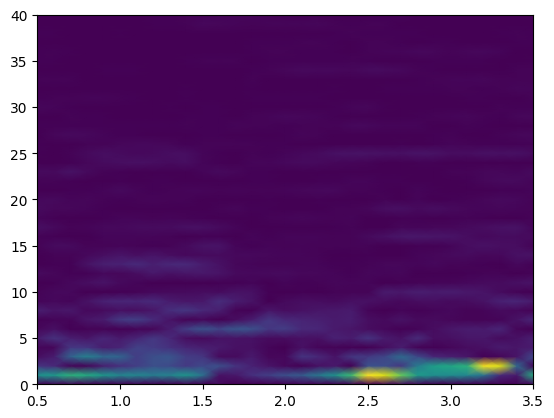

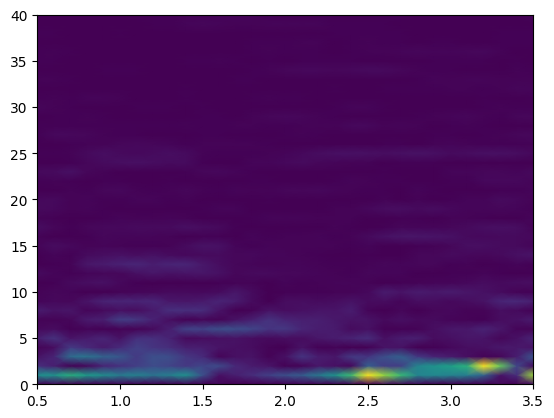

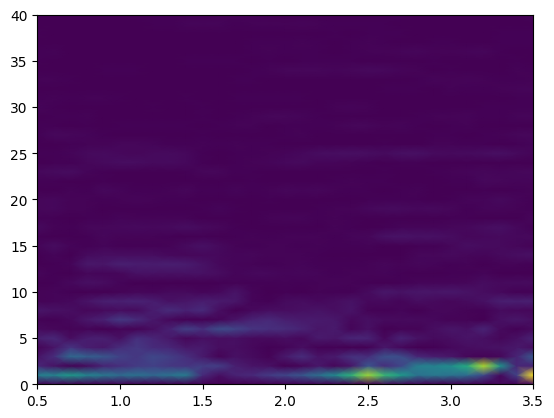

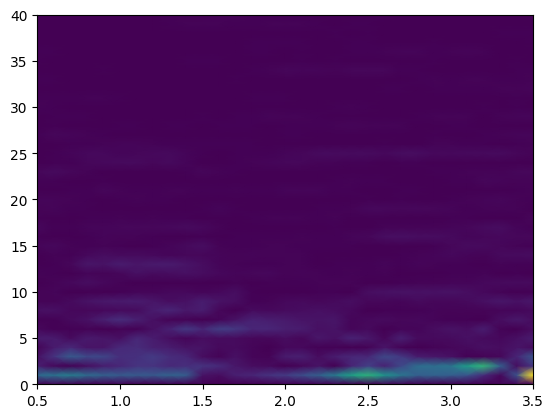

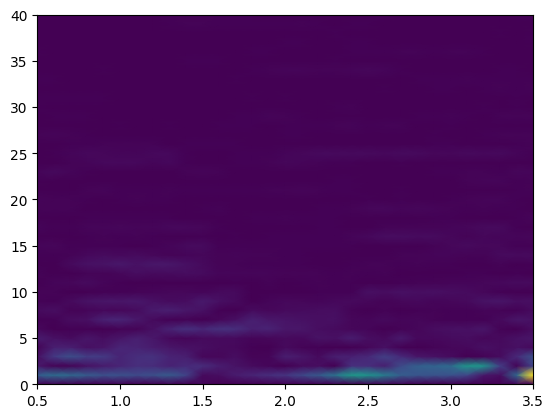

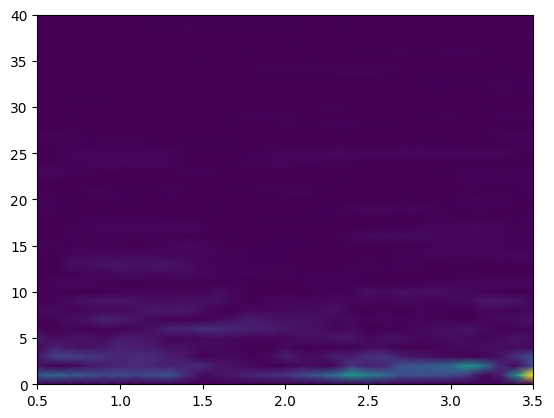

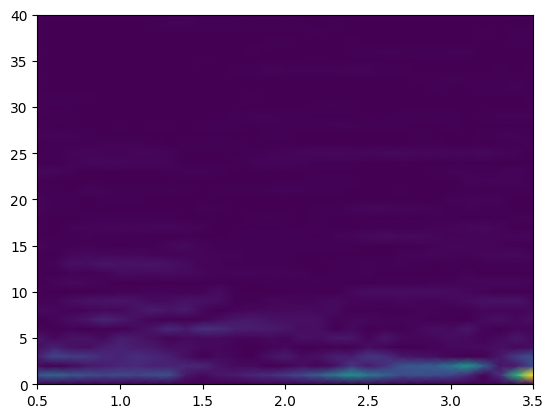

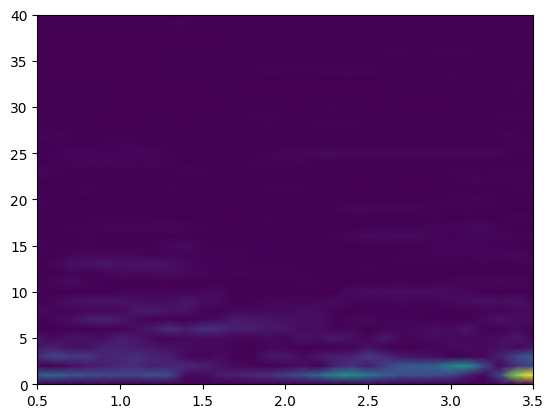

In [115]:
#Generating spectograms
images =  []
labels = []
for i, period in enumerate(annotations[0]):
    #Getting signal data for 4 second period
    
    data = signals[:,int(annotations[0][i]):int(annotations[0][i]+time_period)]

    f, t, image = signal.spectrogram(data,frequency, nperseg = 160, noverlap = frequency*prc_overlap)
    image = np.transpose(image,(1,2,0))

    #updating information containers
    package = [f,t,image]
    images.append(package)

    plt.pcolormesh(t, f, image[:,:,0], shading='gouraud')
    plt.show()
    plt.ylim(0,40)


# for segment in range(len(images)):
#     image = images[segment][2]
#     plt.pcolormesh(images[1], images[0], image[:,:,0], shading='gouraud')
#     plt.show()
    